In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('gurgaon_properties_v3.csv')

In [3]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,NaN,sector 41,7.25,29293.0,2475.0,Plot area 275(229.94 sq.m.),9.0,8.0,3,...,NaN,2475.00,NaN,0,1,0,0,0,0,94
1,flat,vipul lavanya,sector 81,1.28,7174.0,1784.0,Carpet area: 1784 (165.74 sq.m.),3.0,3.0,3,...,NaN,NaN,1784.00,0,1,0,1,0,0,49
2,flat,m3m woodshire,sector 107,1.40,5929.0,2361.0,Super Built up area 2361(219.34 sq.m.),3.0,4.0,N,...,2361.0,NaN,NaN,0,0,0,0,0,0,67
3,flat,ild greens,sector 37c,0.78,5714.0,1365.0,Super Built up area 1365(126.81 sq.m.)Built Up...,2.0,2.0,3,...,1365.0,1068.10,900.00,0,0,0,0,0,0,103
4,flat,ashiana mulberry,sohna road,1.05,5412.0,1940.0,Super Built up area 1940(180.23 sq.m.)Built Up...,2.0,2.0,3,...,1940.0,1175.97,834.96,1,0,0,0,0,1,49


In [ ]:
df.shape

(3770, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3770 entries, 0 to 3769
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3770 non-null   object 
 1   society              3301 non-null   object 
 2   sector               3770 non-null   object 
 3   price                3752 non-null   float64
 4   price_per_sqft       3752 non-null   float64
 5   area                 3752 non-null   float64
 6   areaWithType         3770 non-null   object 
 7   bedRoom              3770 non-null   int64  
 8   bathroom             3770 non-null   int64  
 9   balcony              3770 non-null   object 
 10  floorNum             3751 non-null   float64
 11  facing               2674 non-null   object 
 12  agePossession        3770 non-null   object 
 13  super_built_up_area  1911 non-null   float64
 14  built_up_area        1706 non-null   float64
 15  carpet_area          1929 non-null   f

In [ ]:
df.duplicated().sum()

np.int64(126)

In [ ]:
df.drop_duplicates(inplace=True)

#**property_type**

<Axes: xlabel='property_type'>

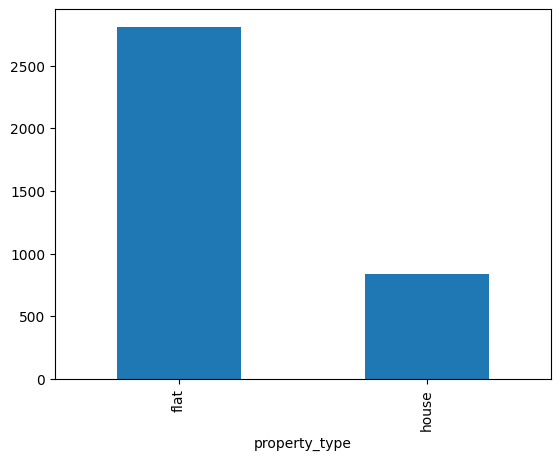

In [ ]:
df['property_type'].value_counts().plot(kind='bar')

**Observations**


*   Flats are in majority
*   No missing values



#**society**

In [ ]:
df['society'].fillna('independent',inplace=True)

In [ ]:
df['society'].value_counts()


,count
society,
independent,469
tulip violet,75
ss the leaf,73
dlf new town heights,42
shapoorji pallonji joyville gurugram,42
...,...
dlf south city 1,1
sanskriti apartments,1
awho sispal vihar,1


In [ ]:
df[df['society']!='independent']['society'].value_counts(normalize=True).cumsum().head(75)

,proportion
society,
tulip violet,0.023622
ss the leaf,0.046614
dlf new town heights,0.059843
shapoorji pallonji joyville gurugram,0.073071
signature global park,0.084094
...,...
ansal heights 86,0.492598
umang winter hills,0.496693
puri emerald bay,0.500787


In [ ]:
society_counts=df['society'].value_counts()
society_counts

,count
society,
independent,469
tulip violet,75
ss the leaf,73
dlf new town heights,42
shapoorji pallonji joyville gurugram,42
...,...
dlf south city 1,1
sanskriti apartments,1
awho sispal vihar,1


In [ ]:
#frequency distribution for the societies
frequency_bins={
    "Very High(>100)":(society_counts>100).sum(),
    "High(50-100)":((society_counts>50) & (society_counts<=100)).sum(),
    "Average(10-49)":((society_counts>=10) & (society_counts<50)).sum(),
    "Low(2-9)":((society_counts>=2) & (society_counts<10)).sum(),
    "Very Low(1)":(society_counts==1).sum()

}

In [ ]:
frequency_bins

{'Very High(>100)': np.int64(1),
 'High(50-100)': np.int64(2),
 'Average(10-49)': np.int64(92),
 'Low(2-9)': np.int64(270),
 'Very Low(1)': np.int64(301)}

<Axes: xlabel='society'>

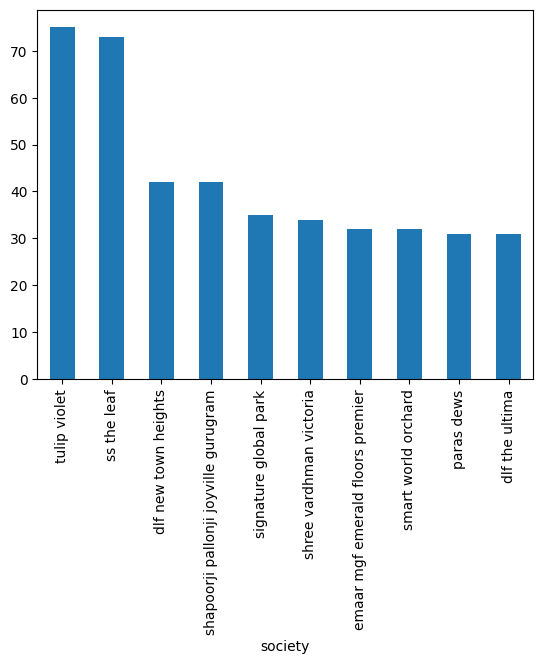

In [ ]:
#top 10 societies
df[df['society']!='independent']['society'].value_counts().head(10).plot(kind='bar')

In [ ]:
df['society'].isnull().sum()

np.int64(0)

In [ ]:
df['society'].value_counts().shape

(666,)

**Observations**

*   Around 13% properties comes under independent tag
*   There are 666 societies
*   The top 75 socities have 50% of the properties and the rest comes under remaining socities



#**Sector**

In [ ]:
df['sector'].value_counts().shape

(108,)

<Axes: xlabel='sector'>

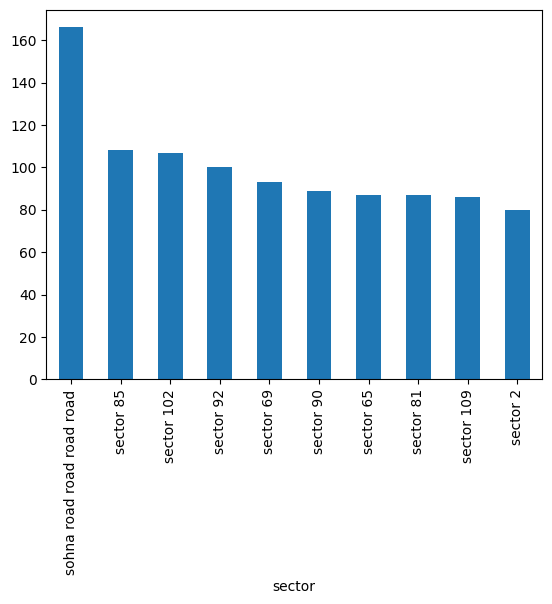

In [ ]:
#top 10 sectors
df['sector'].value_counts().head(10).plot(kind='bar')

In [ ]:
sector_counts=df['sector'].value_counts()
sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': np.int64(3),
 'High (50-100)': np.int64(24),
 'Average (10-49)': np.int64(62),
 'Low (2-9)': np.int64(18),
 'Very Low (1)': np.int64(1)}

#**Price**

In [ ]:
df['price'].isnull().sum()

np.int64(17)

In [ ]:
df['price'].describe()

,price
count,3627.000000
mean,2.515272
std,2.958655
min,0.070000
25%,0.950000
50%,1.510000
75%,2.710000
max,31.500000


<Axes: xlabel='price', ylabel='Count'>

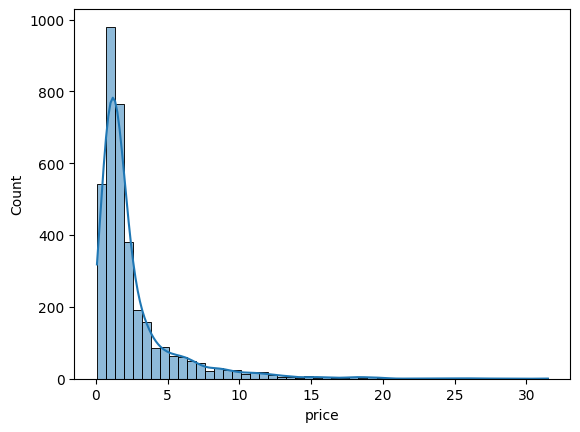

In [ ]:
import seaborn as sns
sns.histplot(df['price'],kde=True,bins=50)

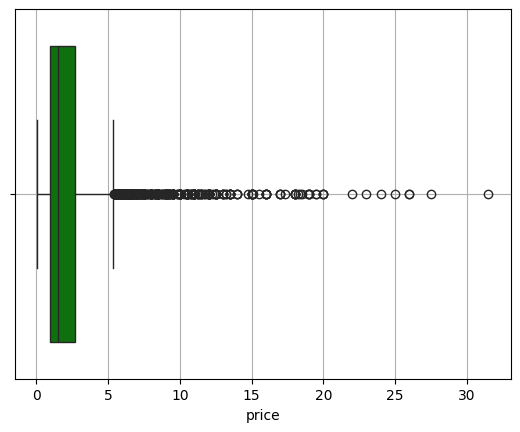

In [ ]:
sns.boxplot(x=df['price'],color='green')
plt.grid()

The data is skewed from kde plot
and boxplot shows the spread of data and potential outliers .
Properties priced above 10 crores might be considered as outliers

In [ ]:
skewness=df['price'].skew()
kurtosis=df['price'].kurtosis()
print(f"Skewness:{skewness}")
print(f"Kurtosis:{kurtosis}")

Skewness:3.324552289418701
Kurtosis:15.415228232807756


Skewness:The price distribution has a skewness of approximately 3.32 , indicating positive skew. This means that the distribution tail is skewed to the right, which aligns with our observation from the histogram where the most properties have prices on the lower end with a few high priced properties.

Kurtosis:The Kurtosis value is approximately 15.4 , 5 times greater than the kurtosis of normal distribution which is 3 indicates the distribution with heavier tails and more outliers compared to a normal distribution

In [ ]:
#Quantile Analysis
quantiles=df['price'].quantile([0.01,0.05,0.95,0.99])
quantiles

,price
0.01,0.25
0.05,0.37
0.95,8.50
0.99,15.00




*   1% Quantile:Only 1% of properties are priced below 0.25 crores
*   5% Quantile: 5% properties are priced below 0.37 crores
*   95% Quantile:95% properties are priced below 8.5 crores
*   99% Quantile:99% properties are priced below 15  crores



In [ ]:
#IQR method for potential outliers
Q1=df['price'].quantile(0.25)
Q3=df['price'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(lower_bound)
print(upper_bound)

-1.6900000000000002
5.35


In [ ]:
outliers=df[(df['price']<lower_bound) | (df['price']>upper_bound)]
outliers.shape

(415, 23)

In [ ]:
outliers['price'].describe()

,price
count,415.000000
mean,9.205060
std,4.088352
min,5.400000
25%,6.400000
50%,8.000000
75%,10.750000
max,31.500000


<Axes: xlabel='price'>

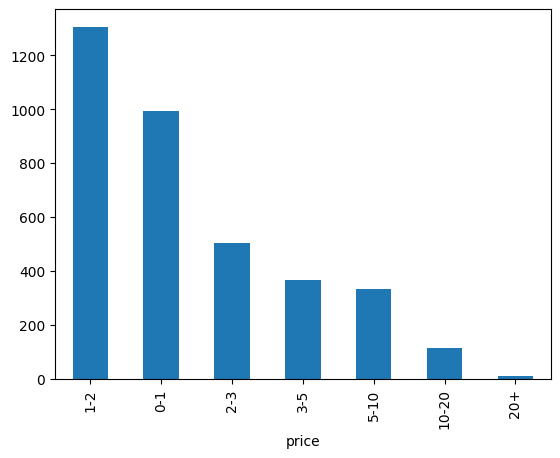

In [ ]:
bins=[0,1,2,3,5,10,20,50]
labels=['0-1','1-2','2-3','3-5','5-10','10-20','20+']
pd.cut(df['price'],bins=bins,labels=labels,right=False).value_counts().plot(kind='bar')

The majority of properties are priced in the "1-2 crores" and "0-1crores"  range. There is a significant drop after 10 crores

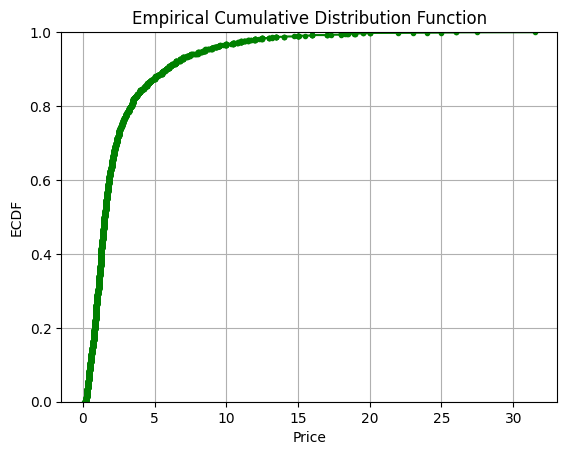

In [ ]:
#Empirical Cumulative Distribution Function ECDF plot , ecdf=cumsum(price)/len(price)
ecdf=sns.ecdfplot(df['price'],marker='.',color='green')
plt.title('Empirical Cumulative Distribution Function')
plt.xlabel('Price')
plt.ylabel('ECDF')
plt.grid()
#plt.show()


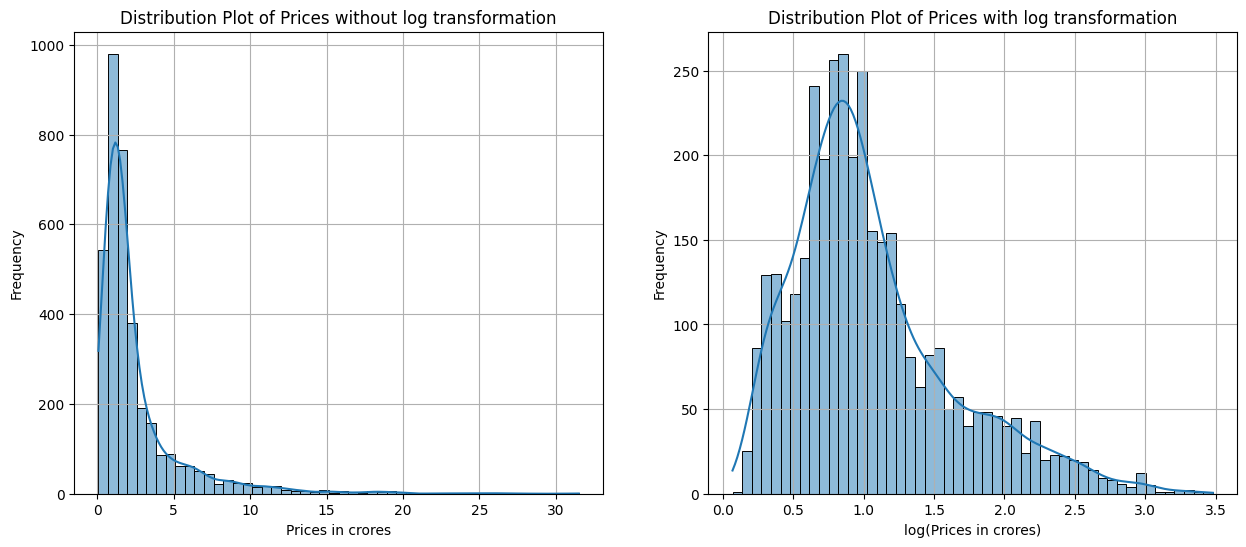

In [ ]:
plt.figure(figsize=(15,6))

#distribution plot without log transformation
plt.subplot(1,2,1)
sns.histplot(df['price'],kde=True,bins=50)
plt.title('Distribution Plot of Prices without log transformation')
plt.xlabel('Prices in crores')
plt.ylabel('Frequency')
plt.grid()

#distribution plot with log transformation
plt.subplot(1,2,2)
sns.histplot(np.log1p(df['price']),kde=True,bins=50)
plt.title('Distribution Plot of Prices with log transformation')
plt.xlabel('log(Prices in crores)')
plt.ylabel('Frequency')
plt.grid()

plt.show()


np.log1p(x):This function computes the natural logarithm of 1+x. It's designed to provide more accurate results for value of x that are very close to zero.   
 Using np.log1p helps in transforming the price column while ensuring that any value (including zero,if present) is handled appropriately. When we need to reverse the transformation , we can use np.expm1 which computes e^x-1

In [ ]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness,kurtosis)

1.0789903937759462 1.0063935743464274


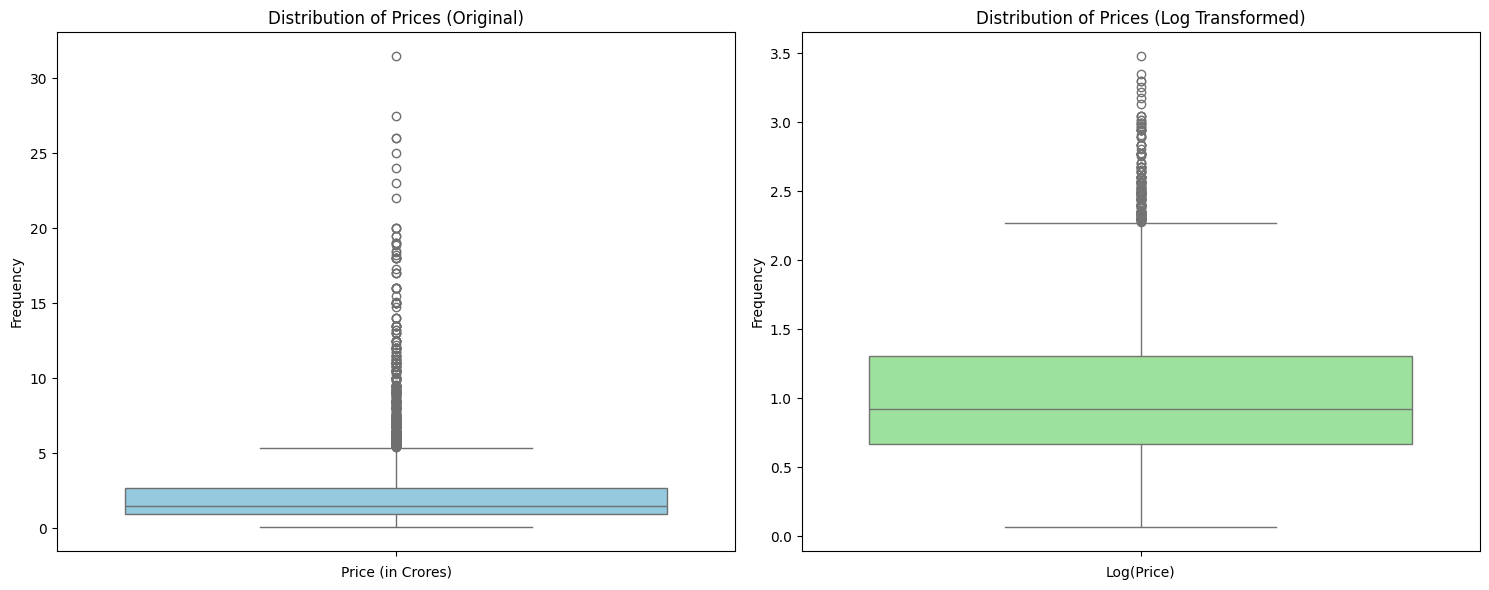

In [ ]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#**price_per_sqft**

In [ ]:
df['price_per_sqft'].isnull().sum()

np.int64(17)

In [ ]:
df['price_per_sqft'].describe()

,price_per_sqft
count,3627.000000
mean,13866.349049
std,23291.110599
min,4.000000
25%,6812.000000
50%,9007.000000
75%,13784.000000
max,600000.000000


<Axes: xlabel='price_per_sqft', ylabel='Count'>

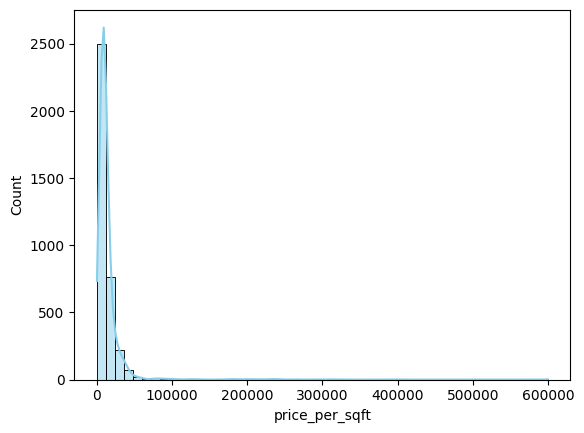

In [ ]:
sns.histplot(df['price_per_sqft'],bins=50,color='skyblue',kde=True)


Most properties have a price_per_sqft ranging between approximately ₹0 to ₹40,000. There is a significant concentration in the lower range , with a few properties having exceptionally high price_per_sqft

<Axes: ylabel='price_per_sqft'>

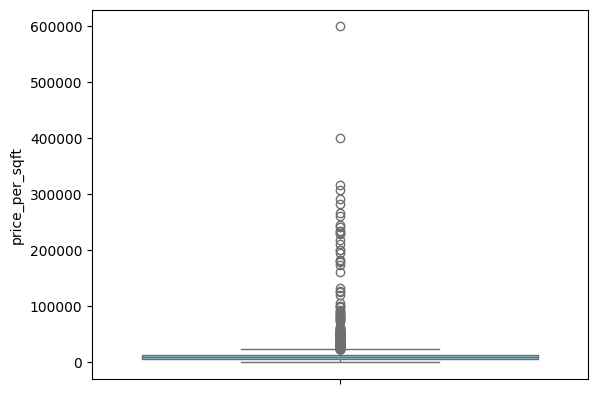

In [ ]:
sns.boxplot(df['price_per_sqft'],color='skyblue')

This box plot shows several outliers , especially on the higher side. The IQR (Interquartile Range) is relatively compact, but there are many data points beyond the "whiskers" of the box plot , indicating potential outliers.

**Observations**

1.   17 missing values
2.   Right Skewed
3.   Potential Outliers



# **BedRoom, BathRoom and Balcony Analysis**

In [ ]:
df['bedRoom'].isnull().sum()

np.int64(0)

<Axes: xlabel='bedRoom'>

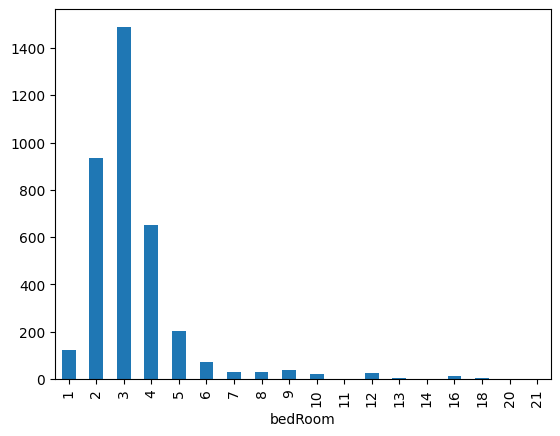

In [ ]:
df['bedRoom'].value_counts().sort_index().plot(kind='bar')

Text(0, 0.5, 'bedRoom')

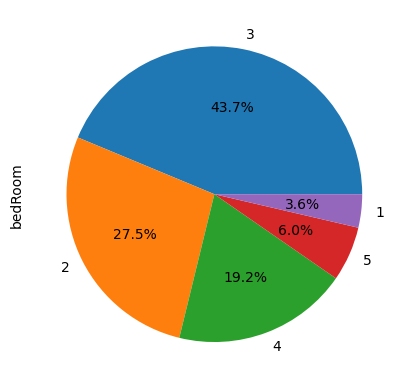

In [ ]:
ax=df['bedRoom'].value_counts().head().plot(kind='pie',autopct='%1.1f%%')
ax.set_ylabel('bedRoom')

In [ ]:
df['bathroom'].isnull().sum()

np.int64(0)

In [ ]:
df['bathroom'].value_counts()

,count
bathroom,
3,1068
2,1040
4,814
5,291
1,156
6,115
7,40
9,39
8,24


<Axes: xlabel='bathroom'>

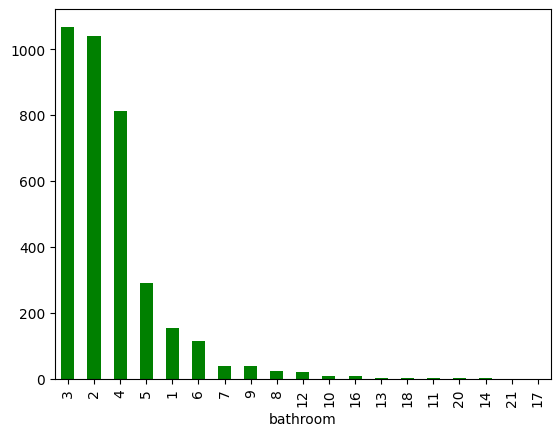

In [ ]:
df['bathroom'].value_counts().plot(kind='bar',color='green')

Text(0, 0.5, 'bathroom')

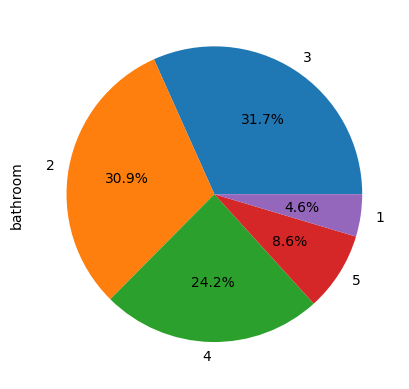

In [ ]:
ax=df['bathroom'].value_counts().head().plot(kind='pie',autopct='%1.1f%%')
ax.set_ylabel('bathroom')

In [ ]:
df['balcony'].isnull().sum()

np.int64(0)

In [ ]:
df['balcony']=df['balcony'].str.replace('N','0')

In [ ]:
df['balcony'].value_counts()

,count
balcony,
3,1885
2,876
1,360
3+,342
0,181


<Axes: xlabel='balcony'>

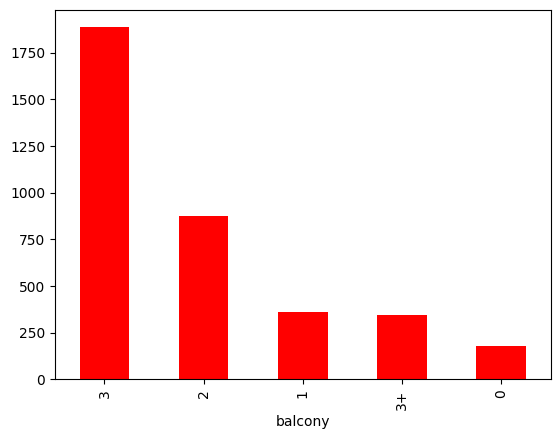

In [ ]:
df['balcony'].value_counts().plot(kind='bar',color='red')

Text(0, 0.5, 'balcony')

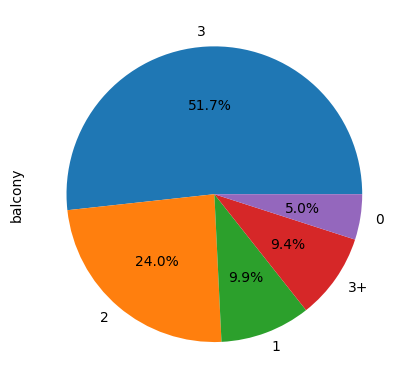

In [ ]:
ax=df['balcony'].value_counts().head().plot(kind='pie',autopct='%1.1f%%')
ax.set_ylabel('balcony')

# **Super bulit up area, built up area, carpet area Analysis**

In [ ]:
#Built up area is important because it is the actual area of the house including balcony

In [ ]:
df['super_built_up_area'].isnull().sum()

np.int64(1773)

In [ ]:
df['super_built_up_area'].describe()

,super_built_up_area
count,1871.000000
mean,1925.379770
std,764.746575
min,89.000000
25%,1479.500000
50%,1828.000000
75%,2215.000000
max,10000.000000


<Axes: xlabel='super_built_up_area', ylabel='Count'>

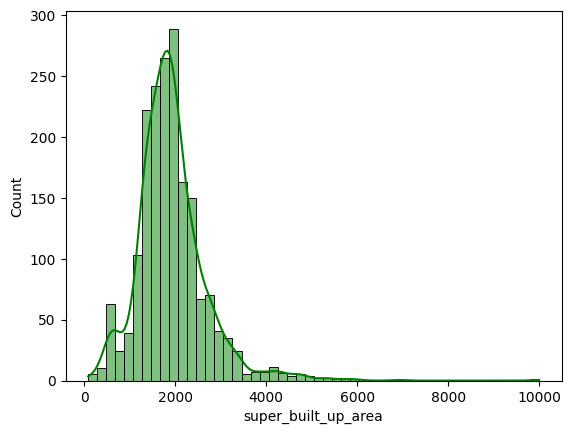

In [ ]:
sns.histplot(df['super_built_up_area'],bins=50,color='green',kde=True)

<Axes: ylabel='super_built_up_area'>

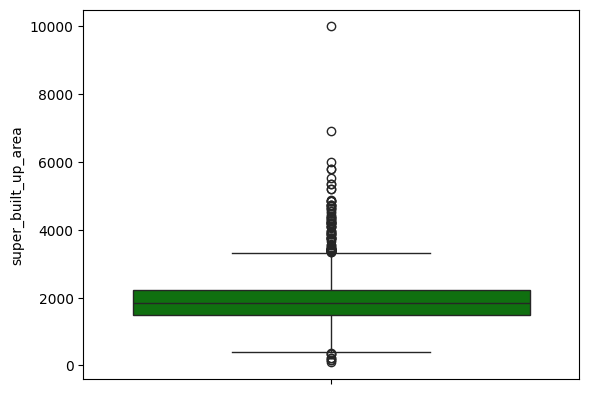

In [ ]:
sns.boxplot(df['super_built_up_area'].dropna(),color='green')

In [ ]:
df['built_up_area'].isnull().sum()

np.int64(1981)

In [ ]:
df['built_up_area'].describe()

,built_up_area
count,1663.000000
mean,2379.349381
std,18085.941893
min,2.000000
25%,1100.000000
50%,1650.000000
75%,2399.500000
max,737147.000000


The presence of extreme values ie. min=2 and max=737147 suggests potential outlier which dominates the entire dataset, the max area is exceptionally large compare to mean and median. It may due to commerical complex or an entire building listed.

<Axes: xlabel='built_up_area', ylabel='Count'>

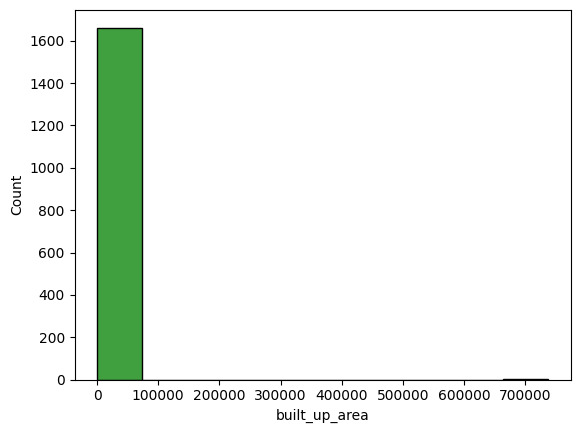

In [ ]:
sns.histplot(df['built_up_area'].dropna(),bins=10,color='green')

<Axes: ylabel='built_up_area'>

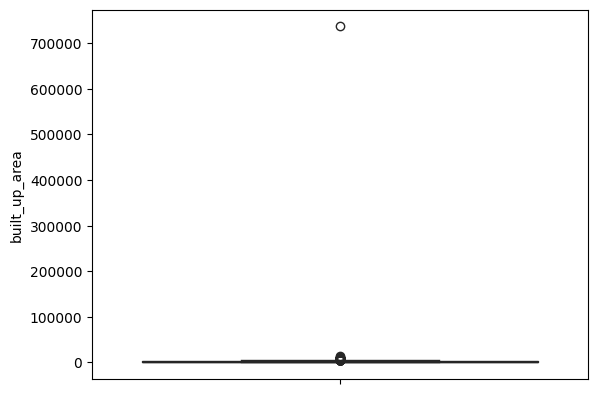

In [ ]:
sns.boxplot(df['built_up_area'].dropna(),color='green')

In [ ]:
df['carpet_area'].isnull().sum()

np.int64(1787)

In [ ]:
df['carpet_area'].describe()

,carpet_area
count,1857.000000
mean,2541.181567
std,22891.341974
min,15.000000
25%,845.000000
50%,1300.000000
75%,1794.000000
max,607936.000000


same observation as built up area

<Axes: xlabel='carpet_area', ylabel='Count'>

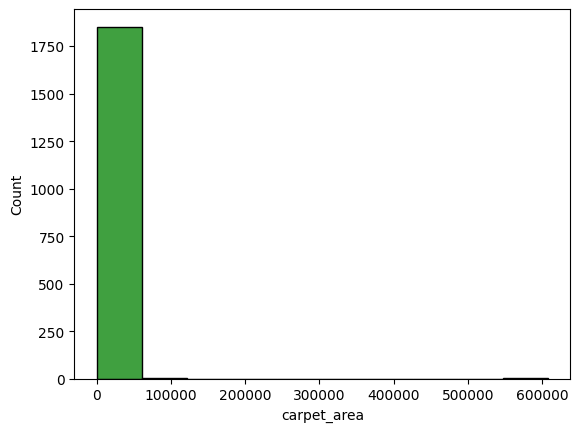

In [ ]:
sns.histplot(df['carpet_area'].dropna(),bins=10,color='green')

<Axes: ylabel='carpet_area'>

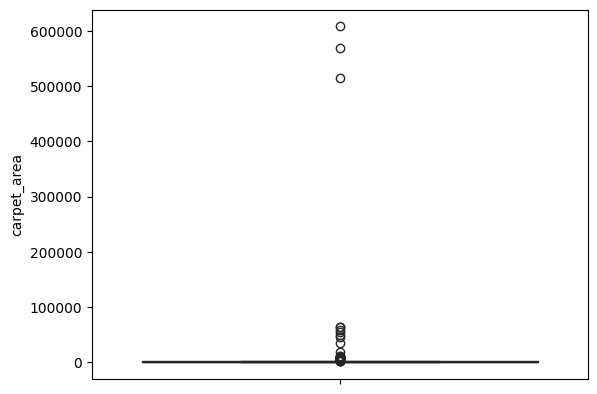

In [ ]:
sns.boxplot(df['carpet_area'].dropna(),color='green')

#**additionalRoom and furnishingType**

In [ ]:
plt.style.use('dark_background')

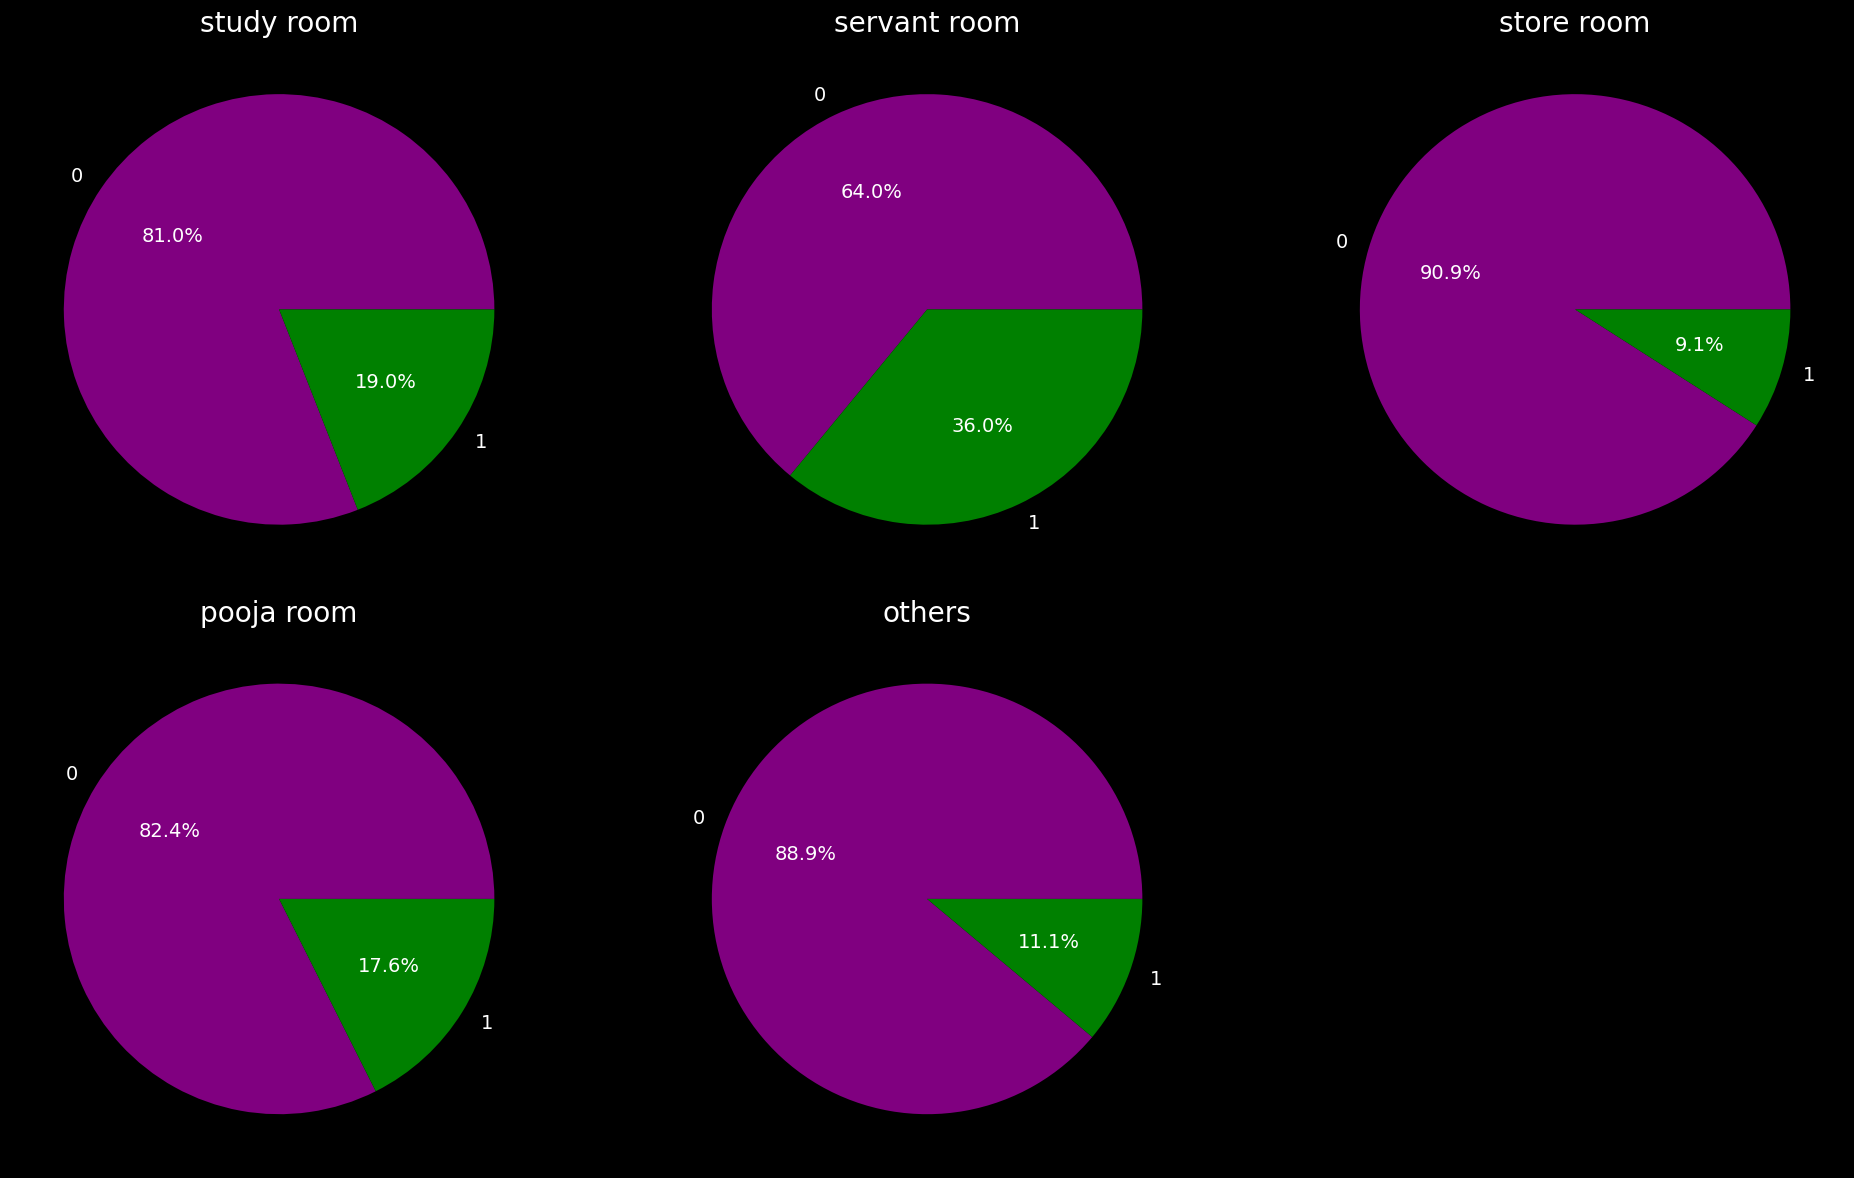

In [ ]:
plt.figure(figsize=(20,12))
#create a subplot of pie charts for each room type
colors = ['purple','green','red']

for idx,room_type in enumerate(['study room','servant room','store room','pooja room','others']):
  plt.subplot(2,3,idx+1)
  df[room_type].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=colors)
  plt.title(room_type)
  plt.ylabel('')
plt.tight_layout()
plt.show()

In [ ]:
df['furnishing_type']

,furnishing_type
0,0
1,0
2,1
3,1
4,1
...,...
3765,0
3766,1
3767,1
3768,1


In [ ]:
df['furnishing_type'].value_counts()

,count
furnishing_type,
0,2313
1,1331


<Axes: ylabel='count'>

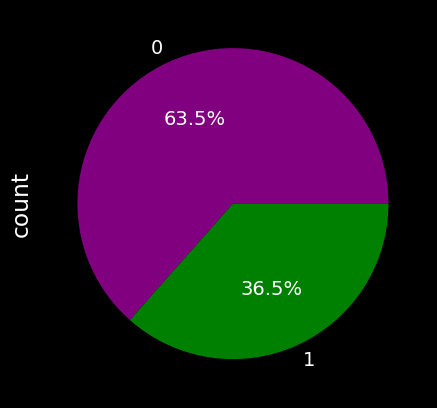

In [ ]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=colors)

# **luxury_score**

In [ ]:
df['luxury_score'].isnull().sum()

np.int64(0)

In [ ]:
df['luxury_score'].describe()

,luxury_score
count,3644.000000
mean,71.671240
std,53.093442
min,0.000000
25%,31.000000
50%,59.000000
75%,110.000000
max,174.000000


<Axes: xlabel='luxury_score', ylabel='Count'>

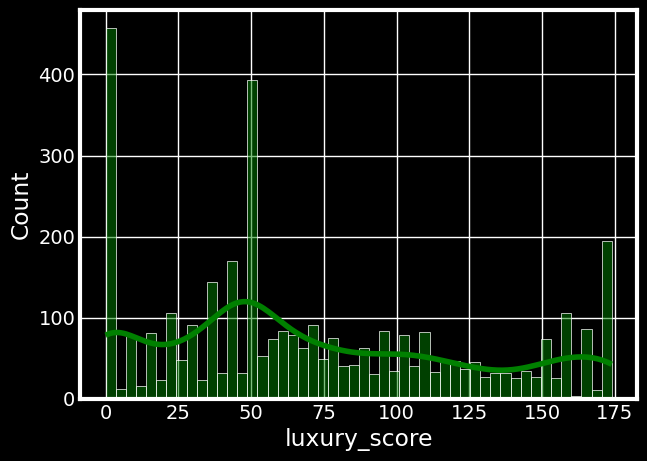

In [ ]:
sns.histplot(df['luxury_score'],bins=50,color='green',kde=True)

The luxury score distribution has multiple peaks, suggesting a multi-modal distribution. There's a significant number of properties with lower luxury scores (around 0-50), and another peak is observed around the 110-130 range.

<Axes: ylabel='luxury_score'>

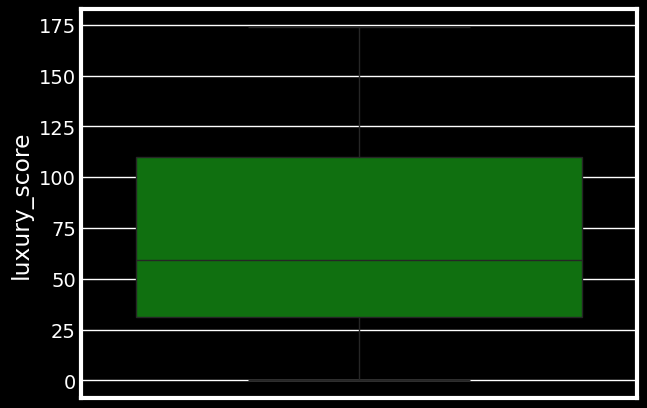

In [ ]:
sns.boxplot(df['luxury_score'],color='green')